## Importing required libraries 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import silhouette_visualizer

In [72]:
conda install -c districtdatalabs yellowbrick 

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38hecd8cb5_0         2.9 MB
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.2            |           py38_0         286 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.2-py_0
  yellowbrick        districtdatalabs/osx-64::yellowbrick-1.2-py38_0

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.9.2-py38hecd8cb5_0



pytest-runner-5.2    | 13 KB     | #####################################

## Importing data 

In [2]:
# Reading data
df = pd.read_csv('/Users/rahulkhandelwal/Desktop/Code/kmeans-evaluation/Wholesale customers data.csv')

In [3]:
# Top rows of the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Exploratory data analysis 

In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Defining the numerical and the categorical columns
numericalColumns = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
categoricalColumns = ['Channel','Region']

In [6]:
# Summary of numerical columns
df.loc[:,numericalColumns].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


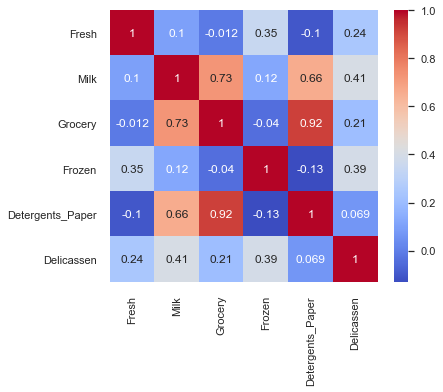

In [7]:
# Visualizing the correlation matrix for numerical columns
corrMatrix = df.loc[:,numericalColumns].corr()

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(corrMatrix, cmap = 'coolwarm', annot = True)
plt.show()

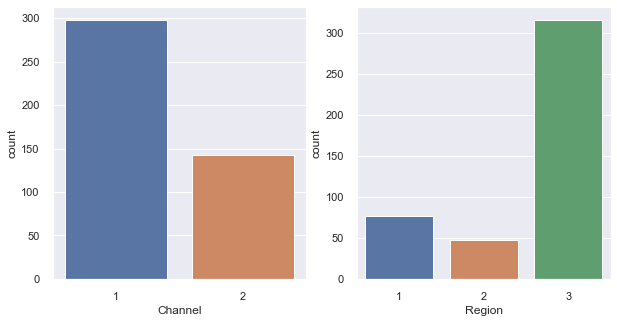

In [8]:
# Visualizing distribution of categorical columns
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for variable, subplot in zip(categoricalColumns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

In [9]:
# Getting dummy variables for the categorical columns
data = pd.get_dummies(data=df, columns=categoricalColumns)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


## Data pre-processing 

In [10]:
# Scaling data with the help of standard scaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [11]:
scaled_data

array([[ 0.05293319,  0.52356777, -0.04111489, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.39130197,  0.54445767,  0.17031835, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.44702926,  0.40853771, -0.0281571 , ..., -0.46056619,
        -0.34582203,  0.62642243],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.13538389, -0.51753572, -0.60251388, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.72930698, -0.5559243 , -0.57322717, ..., -0.46056619,
        -0.34582203,  0.62642243]])

## Elbow Method 

Elbow method using standard dispersion metric.

In [15]:
# Getting the sum of squared distances for different values of k
sum_of_squared_distances = []
n = range(1,12)
for i in n:
    km = KMeans(n_clusters=i)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

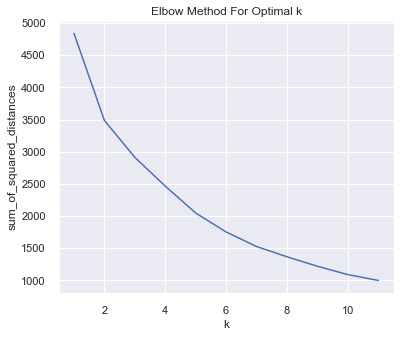

In [16]:
# Plotting the elbow plot
plt.plot(n, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method using calinski_harabasz metric.

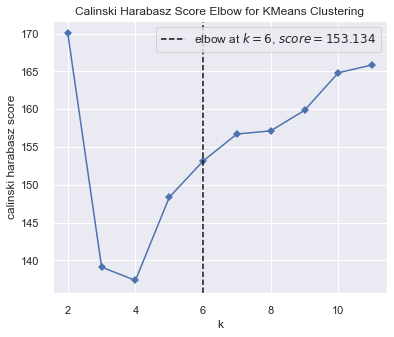

In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(scaled_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Silhouette score

In [48]:
x = scaled_data.copy()

For n_clusters = 2 The average silhouette_score is : 0.3822985274279436
For n_clusters = 3 The average silhouette_score is : 0.3885922473795769
For n_clusters = 4 The average silhouette_score is : 0.4429856721572509
For n_clusters = 5 The average silhouette_score is : 0.4702148998344798
For n_clusters = 6 The average silhouette_score is : 0.4792161625598876
For n_clusters = 7 The average silhouette_score is : 0.45175191479026977
For n_clusters = 8 The average silhouette_score is : 0.5089428349401164
For n_clusters = 9 The average silhouette_score is : 0.4998318098994093
For n_clusters = 10 The average silhouette_score is : 0.5026072575778348


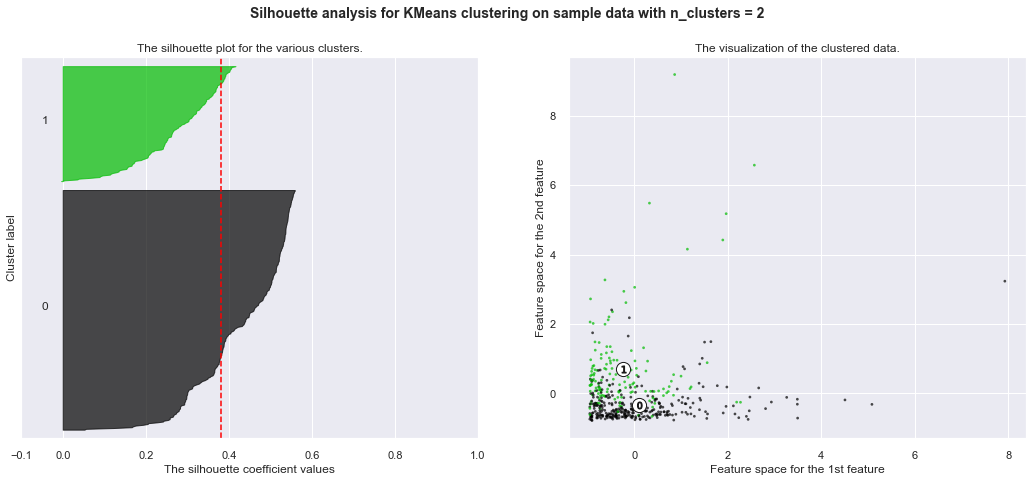

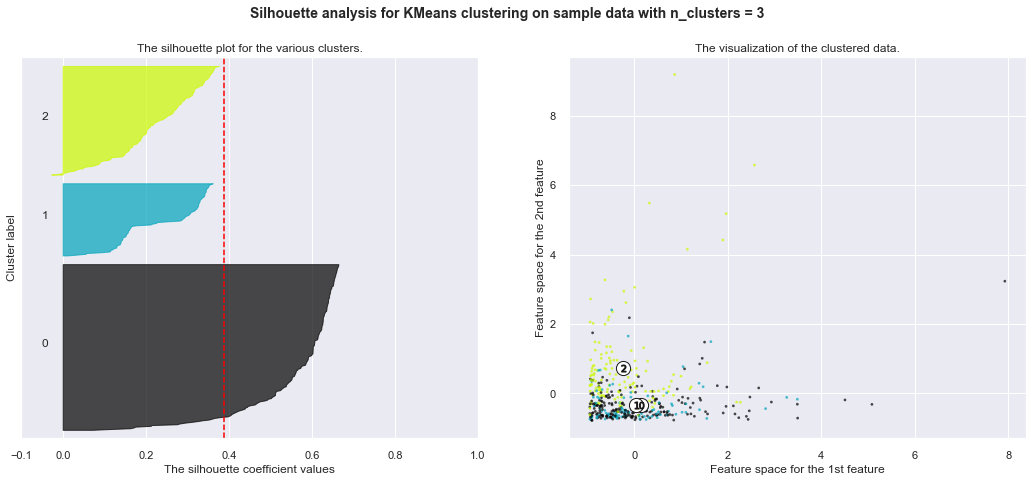

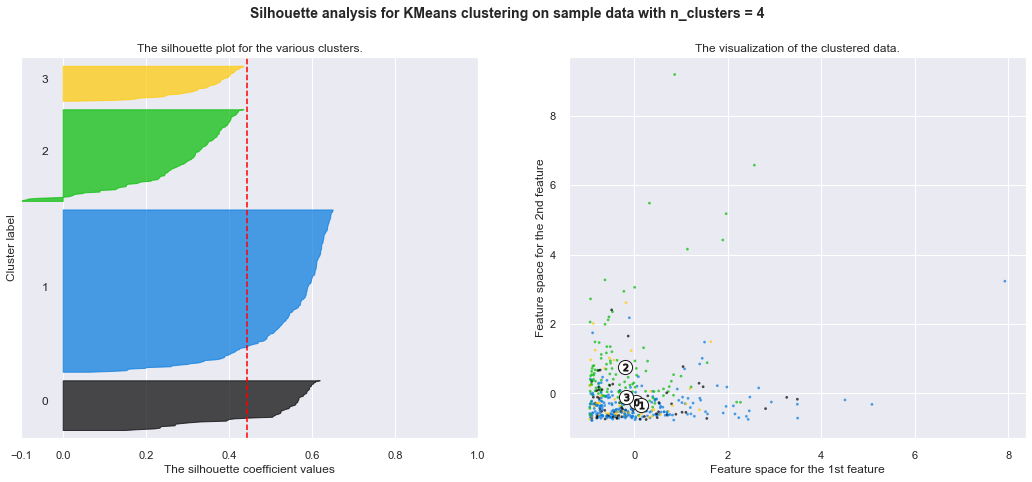

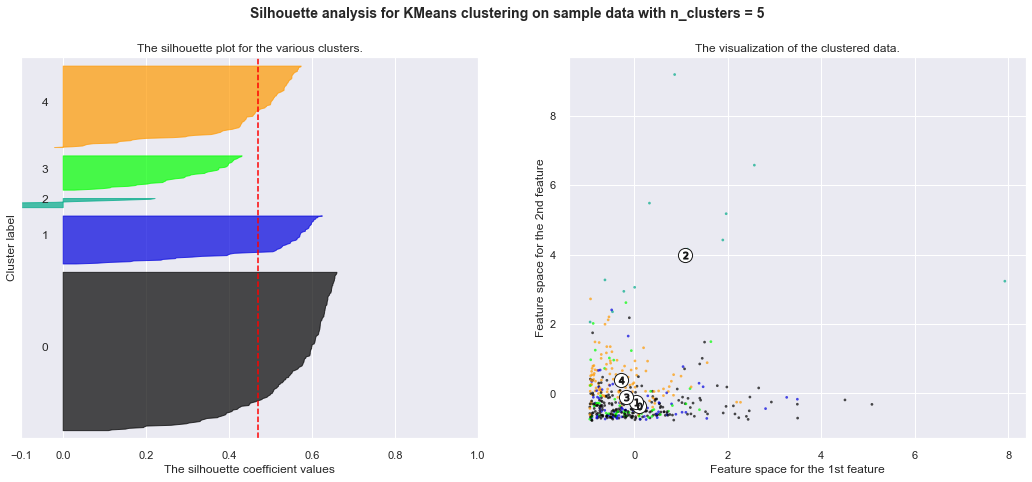

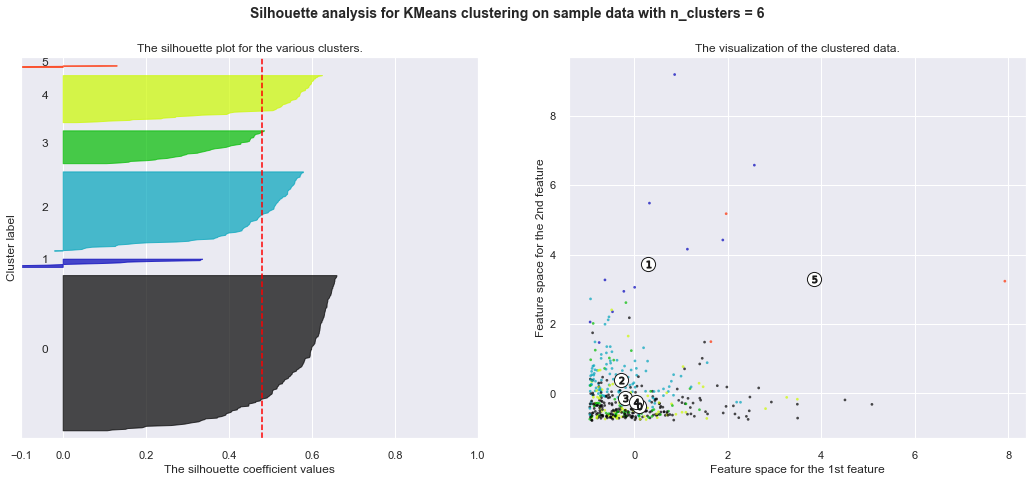

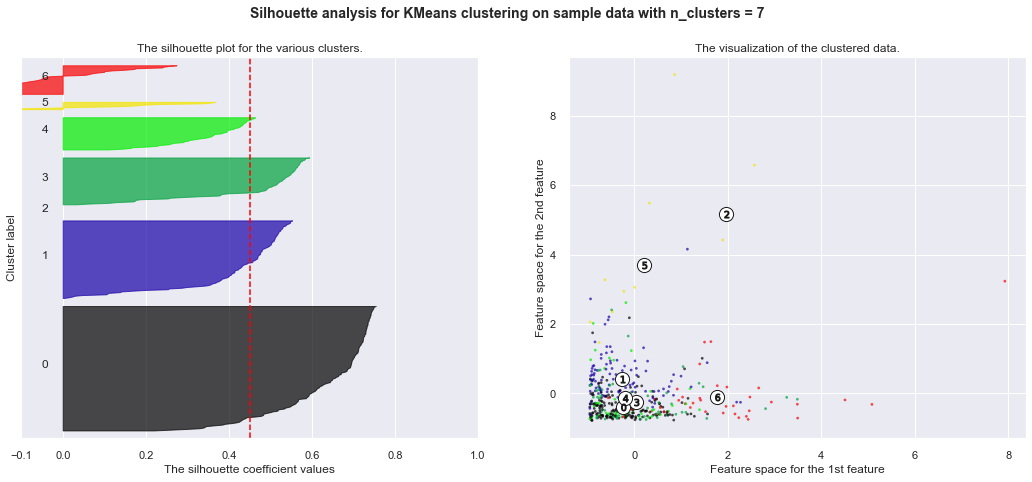

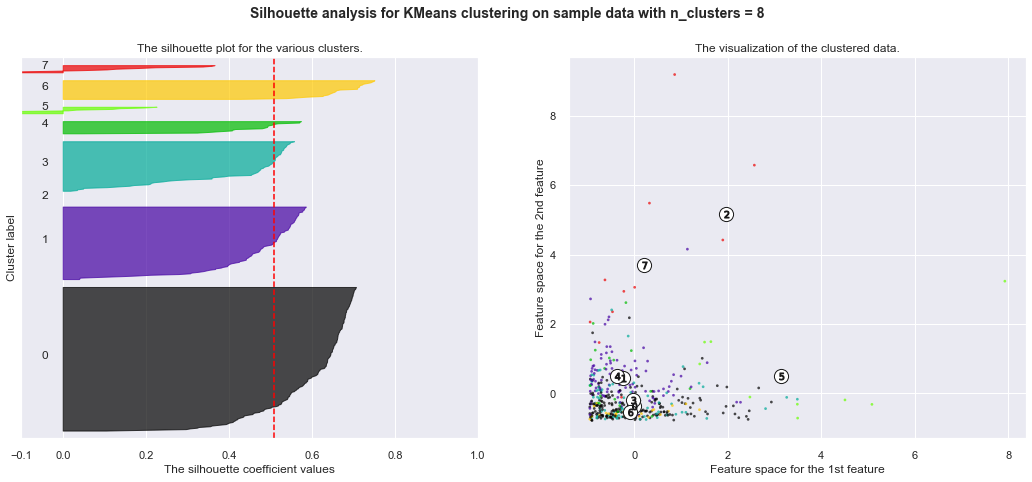

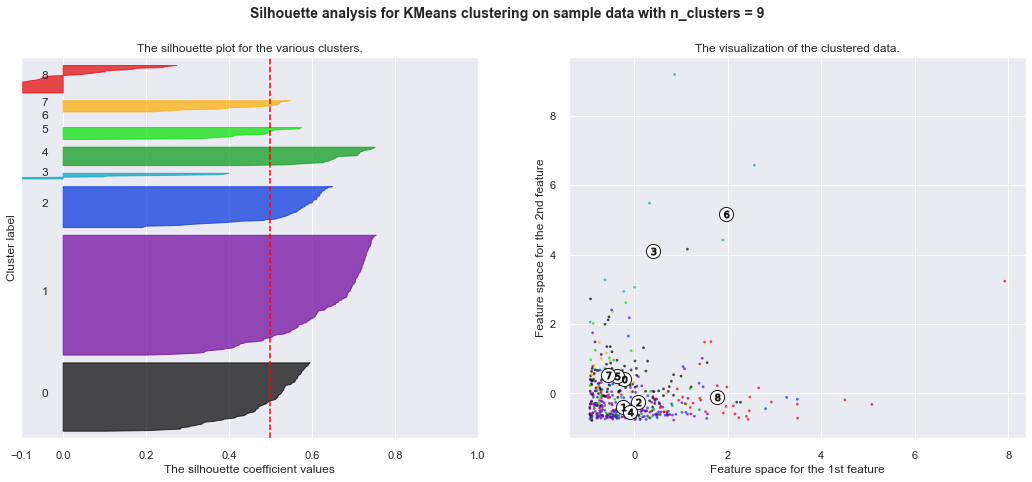

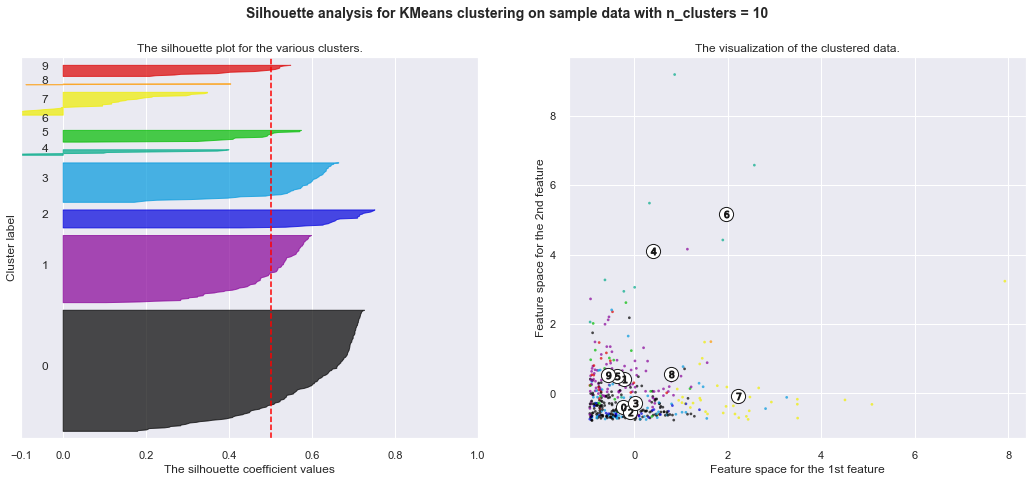

In [53]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [33]:
silhouette = []
for n_clusters in range(2,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3822985274279436)
For n_clusters = 3, silhouette score is 0.3885922473795769)
For n_clusters = 4, silhouette score is 0.44519890046989746)
For n_clusters = 5, silhouette score is 0.4702148998344798)
For n_clusters = 6, silhouette score is 0.4824644368203718)
For n_clusters = 7, silhouette score is 0.45284989608735915)
For n_clusters = 8, silhouette score is 0.47666508354410164)


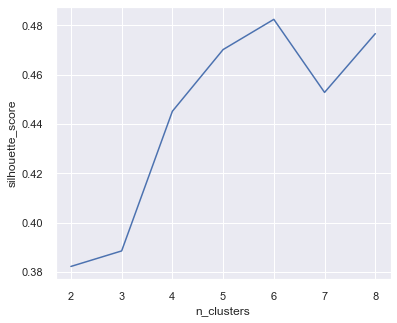

In [54]:
n_clusters = [x for x in range(2,9)]
df_silhouette = pd.DataFrame({'n_clusters':n_clusters,'silhouette_score':silhouette})
sns.lineplot(data=df_silhouette, x="n_clusters", y="silhouette_score")